### Use GPU in google colab
### Clone the yolov5 repository

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 13442, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 13442 (delta 16), reused 8 (delta 4), pack-reused 13414
Receiving objects: 100% (13442/13442), 12.11 MiB | 18.35 MiB/s, done.
Resolving deltas: 100% (9374/9374), done.


### Install required packages that are not included in default google colab
### Restart runtime after installation

In [2]:
!pip install pytesseract
!pip install easyocr

     |████████████████████████████████| 4.3 MB 5.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 70.8 MB 13 kB/s 
     |████████████████████████████████| 47.6 MB 1.2 MB/s 


In [2]:
%cd yolov5

/content/yolov5


### Download required files (model weights, source codes and test images)

In [2]:
# trained model weights
# license_plate_detection.pt
!gdown 1BDlyY83kvk4Cf2RUtatvsMLKpRCvWa2U
# source.py
!gdown 1PVqoAn-t7c77iHOGuCR32sewh9wCr_Rp
# test1.jpg
!gdown 1sNrNr2L85wPZ_EbhOk7wOc00_6nw9Ohr
# test2.jpg
!gdown 1eMxss5h_GIFk9lAN59579JehefWLQDlL
# test3.jpg
!gdown 1vqS2XiR9k8IB_4hienOsUBlHUMs7ZcDa
# test4.jpg
!gdown 1uaFap8jKi7VJDlEl4PWB2n-AHNbvOd29
# test5.jpg
!gdown 11z_WYCCC2yx096tRiUfEolDjzZrltrhE

Downloading...
From: https://drive.google.com/uc?id=1BDlyY83kvk4Cf2RUtatvsMLKpRCvWa2U
To: /content/yolov5/license_plate_detection.pt
100% 92.8M/92.8M [00:00<00:00, 297MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PVqoAn-t7c77iHOGuCR32sewh9wCr_Rp
To: /content/yolov5/source.py
100% 1.70k/1.70k [00:00<00:00, 3.07MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sNrNr2L85wPZ_EbhOk7wOc00_6nw9Ohr
To: /content/yolov5/test1.jpg
100% 601k/601k [00:00<00:00, 62.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eMxss5h_GIFk9lAN59579JehefWLQDlL
To: /content/yolov5/test2.jpg
100% 674k/674k [00:00<00:00, 45.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vqS2XiR9k8IB_4hienOsUBlHUMs7ZcDa
To: /content/yolov5/test3.jpg
100% 398k/398k [00:00<00:00, 73.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uaFap8jKi7VJDlEl4PWB2n-AHNbvOd29
To: /content/yolov5/test4.jpg
100% 192k/192k [00:00<00:00, 65.0MB/s]
Downloading...
From: https://drive.google.com/uc?i

### Start Testing

In [3]:
from source import *
import cv2
from matplotlib import pyplot

In [5]:
model = load_model('./', 'custom', path='license_plate_detection.pt', force_reload=True, source='local')

YOLOv5 🚀 v6.1-196-g614ef11 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients
Adding AutoShape... 


In [6]:
# image_path = './test1.jpg'
# image_path = './test2.jpg'
image_path = './test3.jpg'
# image_path = './test4.jpg'
# image_path = './test5.jpg'
detection = predict(model, image_path)
image = load_image(image_path)

In [7]:
detected_img = []
position = []
for d, p in detection:
    detected_img.append(d)
    position.append(p)
results = plate_translation(detected_img)

In [8]:
new_image = redraw_image(image, results, position)

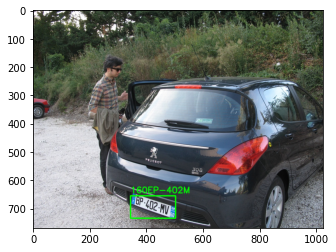

In [9]:
%matplotlib inline
pyplot.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
results

['160EP-402M']